In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/TrafficSystem/TrafficSignalRecognitionSystem.zip" -d "/content/drive/MyDrive/TrafficSystem/TrafficExt"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/14/00014_00021_00023.png  
  inflating: /content/drive/MyDrive/TrafficSystem/TrafficExt/__MACOSX/TrafficSignalRecognitionSystem/Train/14/._00014_00021_00023.png  
  inflating: /content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/14/00014_00012_00025.png  
  inflating: /content/drive/MyDrive/TrafficSystem/TrafficExt/__MACOSX/TrafficSignalRecognitionSystem/Train/14/._00014_00012_00025.png  
  inflating: /content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/14/00014_00003_00002.png  
  inflating: /content/drive/MyDrive/TrafficSystem/TrafficExt/__MACOSX/TrafficSignalRecognitionSystem/Train/14/._00014_00003_00002.png  
  inflating: /content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/14/00014_00003_00016.png  
  inflating: /content/drive/MyDrive/Traff

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 37kB/s 


In [ ]:
!pip install keras

In [50]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [51]:
import os
os.chdir('/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem')
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

from PIL import Image

from google.colab import drive 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [52]:
#print(os.listdir('/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem'))

In [53]:
files = []
path = "/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train"
for file in os.listdir(path):
    files.append(file)
    
print(len(files))

43


In [54]:
imgs_path = "/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train"
data = []
labels = []
classes = 43
for i in range(43):
    p = os.path.join(imgs_path, str(i)) #0-42
    print(p)
    

/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/0
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/1
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/2
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/3
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/4
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/5
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/6
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/7
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/8
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/9
/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train/10
/content/drive/MyDrive/TrafficSystem/Traff

In [71]:
from PIL import Image
imgs_path = "/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Train"
data = []
labels = []
classes = 43

for i in range(43):
    p = os.path.join(imgs_path, str(i)) #0-42
    #print(p)
    for img in os.listdir(p):
        im = Image.open(p + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("successful")
        


successful


In [56]:
#os.mkdir('training1')

FileExistsError: ignored

In [85]:
np.save('./training1/data',data)
np.save('./training1/target',labels)

In [86]:
data=np.load('./training1/data.npy')
labels=np.load('./training1/target.npy')

In [87]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [88]:
x_train = np.array(data)
x_train = x_train / 255
y_train = np.array(labels).astype(np.float)

In [89]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [90]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


In [79]:
#y_train = to_categorical(y_train, 43)
#y_valid = to_categorical(y_test, 43)

In [91]:
#print(y_train.shape, y_.shape)

(31367,) (7842,)


In [92]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu', 
                 input_shape = (30, 30, 3), data_format = 'channels_last',
                 kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

# replace maxpooling with conv2d
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", strides = (2, 2),
                kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation = 'relu' ,
                 kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# replace maxpooling with conv2d
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = "same",
                 kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3), strides = (2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_6 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 9, 128)        

In [93]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train ,y_train,  batch_size = 128, 
         epochs=20, validation_data = (x_valid, y_valid),
          callbacks=[callback, reduce_lr], shuffle = True)

Epoch 1/20
246/246 [==============================] - 305s 1s/step - loss: 9.2597 - accuracy: 0.7152 - val_loss: 7.9626 - val_accuracy: 0.2979
Epoch 2/20
246/246 [==============================] - 301s 1s/step - loss: 3.8825 - accuracy: 0.9202 - val_loss: 3.8963 - val_accuracy: 0.5893
Epoch 3/20
246/246 [==============================] - 305s 1s/step - loss: 2.3991 - accuracy: 0.9374 - val_loss: 1.9993 - val_accuracy: 0.9429
Epoch 4/20
246/246 [==============================] - 302s 1s/step - loss: 1.8077 - accuracy: 0.9481 - val_loss: 1.7732 - val_accuracy: 0.9350
Epoch 5/20
246/246 [==============================] - 302s 1s/step - loss: 1.6854 - accuracy: 0.9511 - val_loss: 1.4514 - val_accuracy: 0.9694
Epoch 6/20
246/246 [==============================] - 302s 1s/step - loss: 1.4280 - accuracy: 0.9549 - val_loss: 1.4444 - val_accuracy: 0.9458
Epoch 7/20
246/246 [==============================] - 300s 1s/step - loss: 1.4324 - accuracy: 0.9565 - val_loss: 1.3493 - val_accuracy: 0.9457

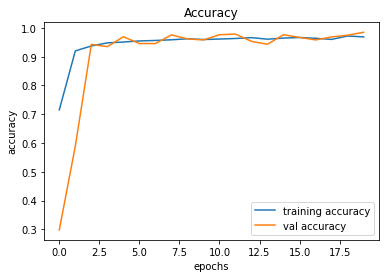

In [110]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

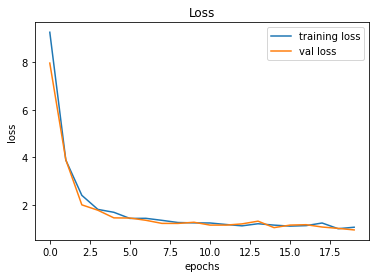

In [111]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [117]:

test = pd.read_csv('/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem/Test.csv')
y_test = test["ClassId"].values
imgs = test["Path"].values
data =[]
for img in imgs:
    image = cv2.imread('/content/drive/MyDrive/TrafficSystem/TrafficExt/TrafficSignalRecognitionSystem' +img)
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

x_test = np.array(data)
x_test = x_test/255
model.evaluate(x_test, y_test)




395/395 [==============================] - 30s 74ms/step - loss: 1.0516 - accuracy: 0.9532


[1.051593542098999, 0.9532066583633423]

# Define hyperparameters for the generators
BATCH_SIZE = 64
IMG_SIZE = (32, 32) # Fixing the image size is a required for our Neural Network. This size may be adjusted as needed.

# Create the training and validation generators
image_gen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.15,
    zoom_range = 0.15,
    rescale = 1/255.0,
    horizontal_flip=False,
    vertical_flip=False,
    validation_split= 0.2,
    fill_mode = 'nearest')

# Training Generator
train_gen = image_gen.flow_from_dataframe(
    training_dataframe,
    directory=BASE_PATH,
    x_col='Path',
    y_col='ClassId',
    target_size=IMG_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    subset="training",
)


# Validation Generator
val_gen = image_gen.flow_from_dataframe(
    training_dataframe,
    directory=BASE_PATH,
    x_col="Path",
    y_col='ClassId',
    target_size=IMG_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    subset="validation",
)

# Test Training Generator with a sample
gen = next(train_gen)
print(gen[0].shape) # Confirm BATCH_SIZE, and IMG_SIZE
plt.imshow(gen[0][0,:,:,:]) # show sample image

In [47]:
history = classifier.fit(x = train_gen, 
               epochs = EPOCHS, 
               validation_data = val_gen, 
               verbose = True)





Epoch 1/20
981/981 [==============================] - 130s 131ms/step - loss: 3.6412 - accuracy: 0.0543 - val_loss: 3.4920 - val_accuracy: 0.0575
Epoch 2/20
981/981 [==============================] - 128s 130ms/step - loss: 3.4978 - accuracy: 0.0547 - val_loss: 3.4913 - val_accuracy: 0.0576
Epoch 3/20
981/981 [==============================] - 128s 131ms/step - loss: 3.4940 - accuracy: 0.0530 - val_loss: 3.4919 - val_accuracy: 0.0560
Epoch 4/20
981/981 [==============================] - 128s 131ms/step - loss: 3.4981 - accuracy: 0.0576 - val_loss: 3.4920 - val_accuracy: 0.0522
Epoch 5/20
981/981 [==============================] - 128s 130ms/step - loss: 3.4906 - accuracy: 0.0567 - val_loss: 3.4905 - val_accuracy: 0.0575
Epoch 6/20
981/981 [==============================] - 129s 131ms/step - loss: 3.4910 - accuracy: 0.0560 - val_loss: 3.4911 - val_accuracy: 0.0575
Epoch 7/20
981/981 [==============================] - 128s 130ms/step - loss: 3.4889 - accuracy: 0.0570 - val_loss: 3.4901 -

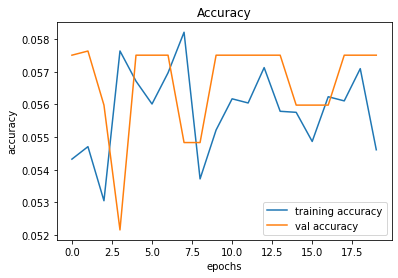

In [48]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

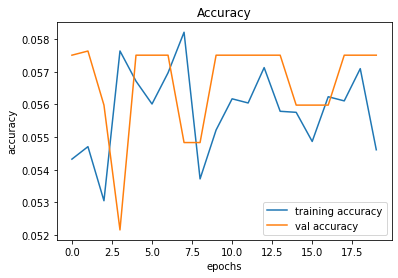

In [49]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()